In [1]:
import os
import pandas
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
from fb_qualities import spectrogram

base_dir = "D:/soundofai/all_nsynth_audio/"

In [2]:
fbq_stats = pandas.read_csv("fbq_stats.csv")
fbq_stats.head()

,pitch,fbq,high,low
0,36,fb_thin_ratio,0.497678,0.343088
1,37,fb_thin_ratio,0.497880,0.343626
2,38,fb_thin_ratio,0.489702,0.349344
3,39,fb_thin_ratio,0.495302,0.289731
4,40,fb_thin_ratio,0.488460,0.305299


In [3]:
stats = {}

for i, row in fbq_stats.iterrows():
    fbq = row["fbq"]
    pitch = int(row["pitch"])
    high = float(row["high"])
    low = float(row["low"])
    
    fbq = fbq[:-6]
    
    if fbq not in stats:
        stats[fbq] = {}
    stats[fbq][pitch] = {
        "high": high,
        "low": low
    }

In [4]:
fb_ratios = pandas.read_csv("fb_ratios.csv", index_col=0)
fb_ratios.head()

,file,pitch,fb_thin_ratio,fb_thin_band_amp,fb_thin_total_amp,fb_hollow_ratio,fb_hollow_band_amp,fb_hollow_total_amp,fb_dark_ratio,fb_dark_band_amp,...,fb_honky_total_amp,fb_harsh_ratio,fb_harsh_band_amp,fb_harsh_total_amp,fb_tinny_ratio,fb_tinny_band_amp,fb_tinny_total_amp,fb_sibilance_ratio,fb_sibilance_band_amp,fb_sibilance_total_amp
0,guitar_acoustic_000-036-025.wav,36,0.420316,4.172719,9.927567,0.647367,6.426776,9.927567,0.209906,2.083859,...,9.927567,0.304820,3.026122,9.927567,0.079756,0.791785,9.927567,0.133536,1.325691,9.927567
1,guitar_acoustic_000-036-050.wav,36,0.377758,2.180780,5.772957,0.646514,3.732295,5.772957,0.208686,1.204737,...,5.772957,0.305475,1.763495,5.772957,0.081487,0.470422,5.772957,0.132277,0.763627,5.772957
2,guitar_acoustic_000-036-075.wav,36,0.321677,4.034044,12.540665,0.661868,8.300266,12.540665,0.218304,2.737671,...,12.540665,0.346894,4.350280,12.540665,0.112690,1.413210,12.540665,0.136517,1.712018,12.540665
3,guitar_acoustic_000-036-100.wav,36,0.380922,3.230567,8.480923,0.692726,5.874956,8.480923,0.182316,1.546211,...,8.480923,0.304693,2.584075,8.480923,0.106068,0.899552,8.480923,0.091420,0.775326,8.480923
4,guitar_acoustic_000-036-127.wav,36,0.343580,2.585386,7.524832,0.649302,4.885886,7.524832,0.220241,1.657278,...,7.524832,0.350031,2.633927,7.524832,0.114407,0.860891,7.524832,0.128810,0.969275,7.524832


fb_thin
at pitch 81
r=0.04 lo=0.04 hi=0.07


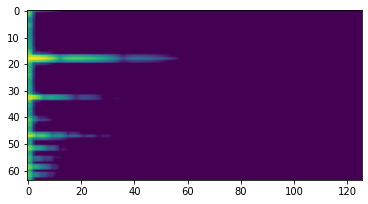

In [28]:
# looking at thin - select random, display fb_ratio, high and low markers
q = "fb_thin"

sample = fb_ratios.sample()
file_name = str(sample["file"].values[0])
ratio = sample[f"{q}_ratio"].values[0]
pitch = int(sample["pitch"])
high = stats[q][pitch]["high"]
low = stats[q][pitch]["low"]
file_path = os.path.join(base_dir, file_name)
spec = spectrogram.get_mel_spectrogram(file_path)

print(q)
print("at pitch", pitch)
print(f"r={ratio:.2f} lo={low:.2f} hi={high:.2f}")

plt.imshow(spec);

Audio(file_path, rate=16000)